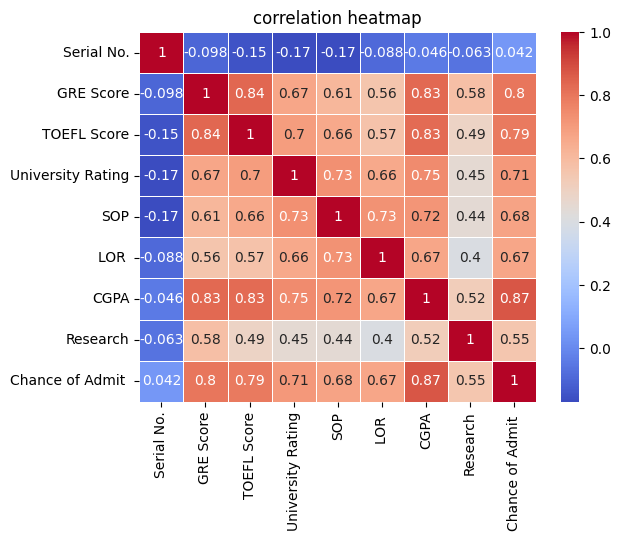

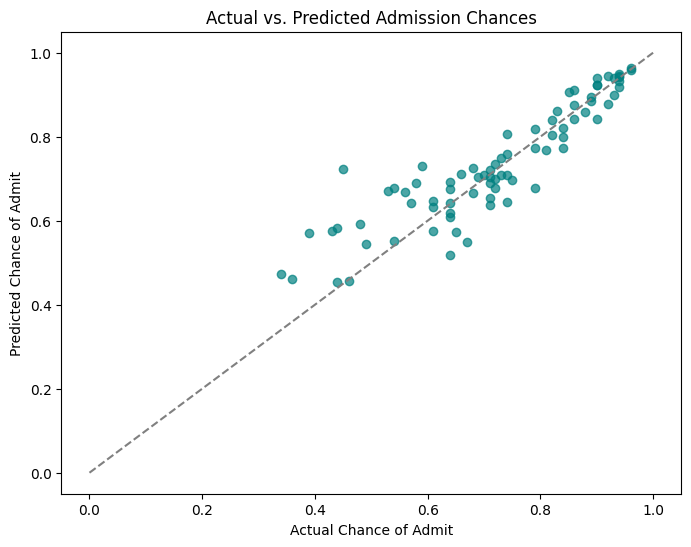

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor



df=pd.read_csv('/content/Admission_Predict.csv')

# df.describe()
# df.info()
# df.head(20)

corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("correlation heatmap")

# df.isnull().sum()

df.drop('Serial No.', axis=1, inplace=True)
df.rename(columns={'Chance of Admit ': 'Chance of Admit'}, inplace=True)
X= df.drop('Chance of Admit',axis=1)
y=df['Chance of Admit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model= RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.xlabel("Actual Chance of Admit")
plt.ylabel("Predicted Chance of Admit")
plt.title("Actual vs. Predicted Admission Chances")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.show()